In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [13]:
BTC = yf.download('BTC-USD', start='2023-04-20', end='2023-04-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [14]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-20 00:00:00+00:00,28823.683594,28823.683594,28823.683594,28823.683594,28823.683594,0
2023-04-20 00:01:00+00:00,28810.832031,28810.832031,28810.832031,28810.832031,28810.832031,1452032
2023-04-20 00:02:00+00:00,28795.544922,28795.544922,28795.544922,28795.544922,28795.544922,5453824
2023-04-20 00:03:00+00:00,28807.896484,28807.896484,28807.896484,28807.896484,28807.896484,1904640
2023-04-20 00:04:00+00:00,28809.228516,28809.228516,28809.228516,28809.228516,28809.228516,21735424
...,...,...,...,...,...,...
2023-04-20 23:54:00+00:00,28264.910156,28264.910156,28264.910156,28264.910156,28264.910156,0
2023-04-20 23:55:00+00:00,28269.878906,28269.878906,28269.878906,28269.878906,28269.878906,0
2023-04-20 23:56:00+00:00,28266.107422,28266.107422,28266.107422,28266.107422,28266.107422,0


In [16]:
ETH = yf.download('ETH-USD', start='2023-04-20', end='2023-04-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [17]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-20 00:00:00+00:00,1936.417969,1936.417969,1936.417969,1936.417969,1936.417969,0
2023-04-20 00:01:00+00:00,1934.838501,1934.838501,1934.838501,1934.838501,1934.838501,0
2023-04-20 00:02:00+00:00,1933.500488,1933.500488,1933.500488,1933.500488,1933.500488,1747968
2023-04-20 00:03:00+00:00,1933.744019,1933.744019,1933.744019,1933.744019,1933.744019,7857152
2023-04-20 00:04:00+00:00,1935.113770,1935.113770,1935.113770,1935.113770,1935.113770,5656576
...,...,...,...,...,...,...
2023-04-20 23:54:00+00:00,1945.146118,1945.146118,1945.146118,1945.146118,1945.146118,0
2023-04-20 23:55:00+00:00,1945.637451,1945.637451,1945.637451,1945.637451,1945.637451,23109632
2023-04-20 23:56:00+00:00,1944.978394,1944.978394,1944.978394,1944.978394,1944.978394,0


In [18]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [19]:
S1_0

28823.68359375

In [20]:
S2_0

1936.41796875

In [48]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * len(BTC)
mu_2 = lr2.mean() * len(ETH)
sigma_1 = lr1.std() * np.sqrt(1426)
sigma_2 = lr2.std() * np.sqrt(1426)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(BTC)

In [49]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [50]:
result

LinregressResult(slope=0.41057891533236984, intercept=3.3611484106139518, rvalue=0.6626888345542203, pvalue=8.514567206164995e-181, stderr=0.012304331982038463, intercept_stderr=0.12628700544884752)

In [51]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [52]:
len(S1)

1425

In [53]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

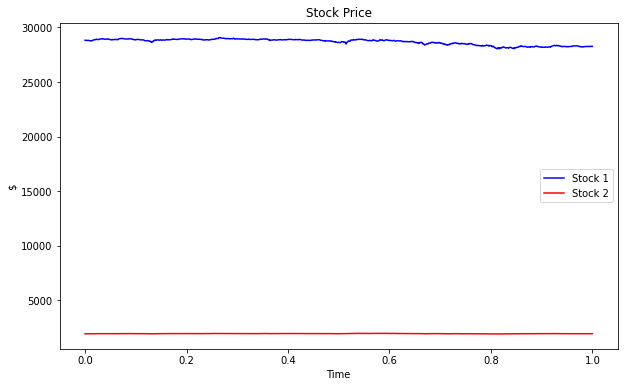

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

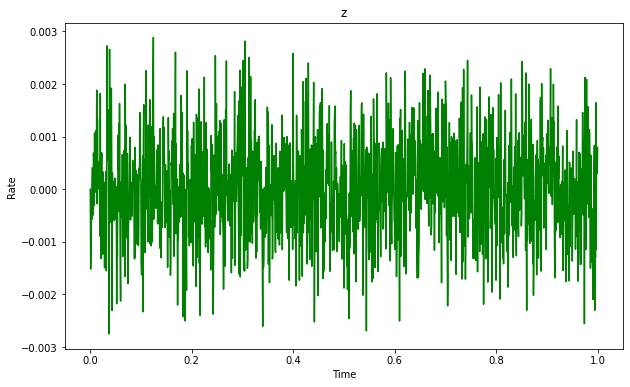

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [56]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

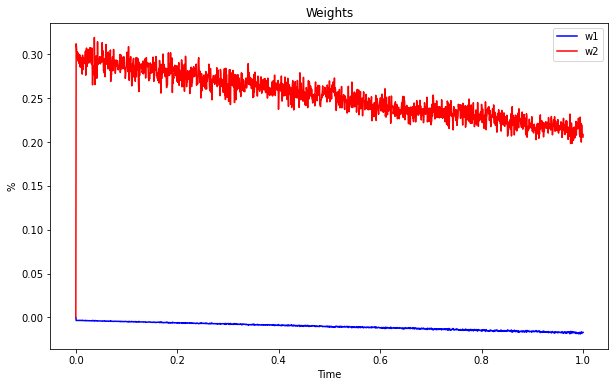

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

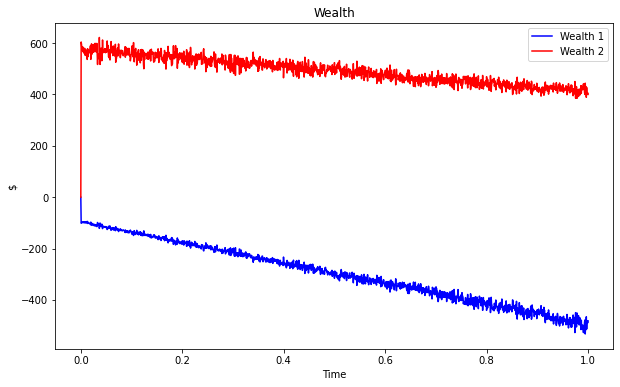

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [59]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

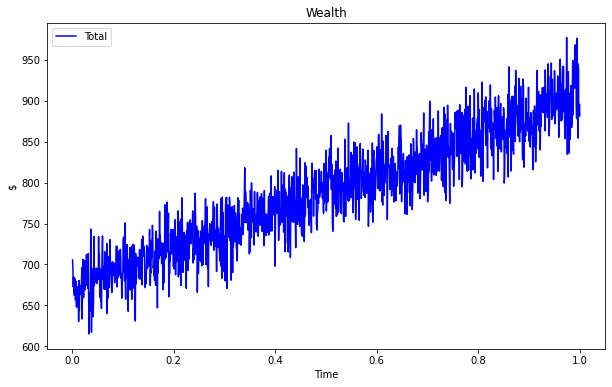

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [61]:
Wealth[1]

array([705.52664354])

In [62]:
Wealth[-1]

array([881.37749563])

In [63]:
(Wealth[-1] - Wealth[1])/(Wealth[1])*100

array([24.92476417])